In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
df = pd.read_csv('/kaggle/input/imdb-top250-india/IMdB_India_Top250.csv')

# basic Information
print("Dataset Information:")
print(df.info())

print("\nFirst Few Rows:")
print(df.head())

# summary Statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Movie name             250 non-null    object 
 1   Year of release        250 non-null    int64  
 2   Watch  hour            250 non-null    object 
 3   Rating                 250 non-null    float64
 4   Ratedby                250 non-null    object 
 5   Film Industry          250 non-null    object 
 6   Genre                  250 non-null    object 
 7   Director               250 non-null    object 
 8   Box office collection  250 non-null    object 
 9   User reviews           250 non-null    int64  
 10  Awards                 250 non-null    object 
 11  Description            250 non-null    object 
 12  Streaming platform     250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 25.5+ KB
None

First Few Rows:
        

In [2]:
# convert Box Office Collection to numeric
df['Box office collection'] = df['Box office collection'].replace({'NIL': '0'}, regex=True)
df['Box office collection'] = df['Box office collection'].replace({'\$': ''}, regex=True)
df['Box office collection'] = df['Box office collection'].replace({',': ''}, regex=True)
df['Box office collection'] = pd.to_numeric(df['Box office collection'], errors='coerce')

In [3]:
# print column names to identify any issues
print("Column Names:")
print(df.columns)

Column Names:
Index(['Movie name', 'Year of release', 'Watch  hour ', 'Rating', 'Ratedby',
       'Film Industry', 'Genre', 'Director', 'Box office collection',
       'User reviews', 'Awards', 'Description', 'Streaming platform'],
      dtype='object')


In [4]:
# convert Watch Hour to total minutes
def convert_watch_hour_to_minutes(watch_hour):
    parts = watch_hour.split()
    hours = minutes = 0
    if 'hour' in parts:
        hours = int(parts[0])
    if 'minute' in parts:
        minutes = int(parts[2])
    return hours * 60 + minutes

In [5]:
# ensure correct column name for Watch hour
watch_hour_column = 'Watch  hour '  # Adjust this based on the actual column name
if watch_hour_column in df.columns:
    df['Watch hour (minutes)'] = df[watch_hour_column].apply(convert_watch_hour_to_minutes)
else:
    print(f"Column '{watch_hour_column}' not found in the DataFrame.")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


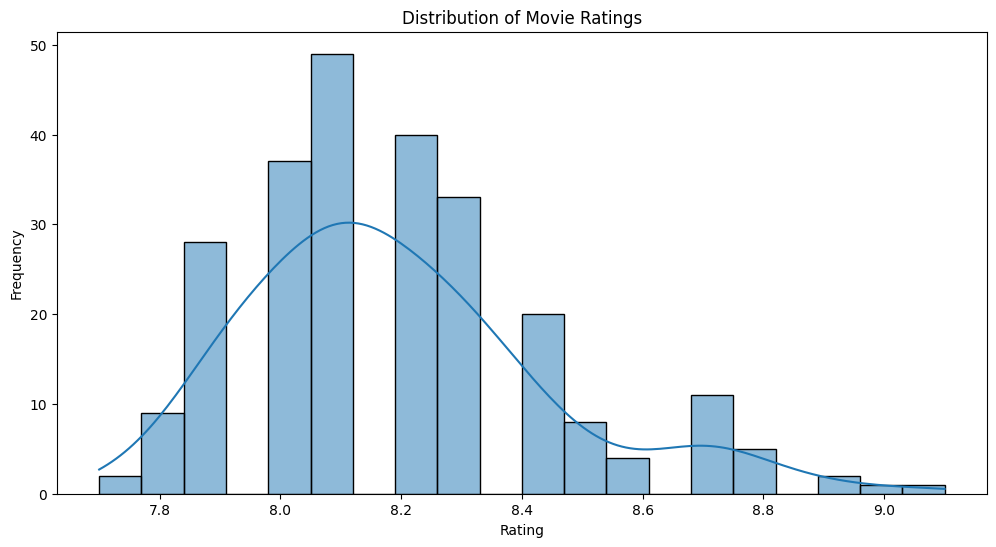

In [6]:
# data Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Rating'], kde=True, bins=20)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


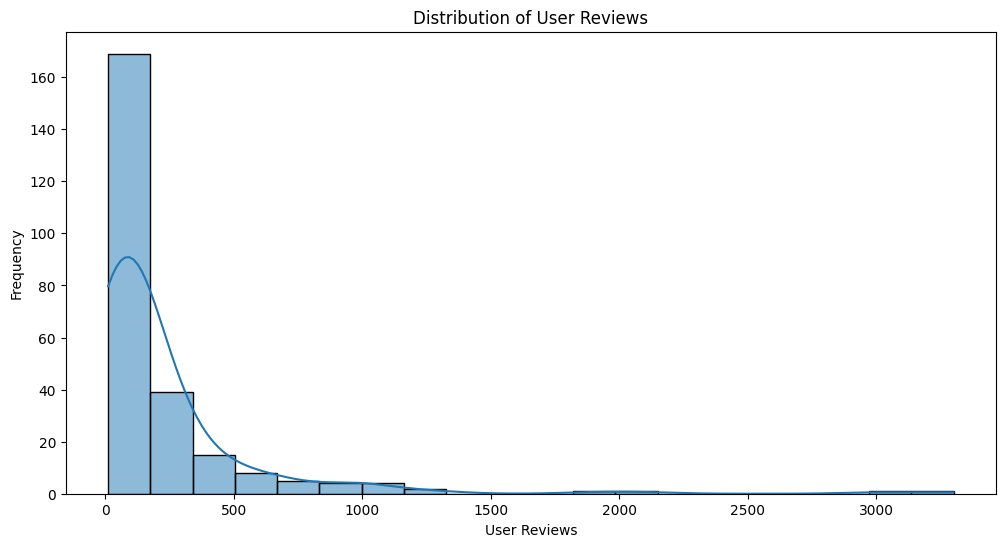

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(df['User reviews'], kde=True, bins=20)
plt.title('Distribution of User Reviews')
plt.xlabel('User Reviews')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


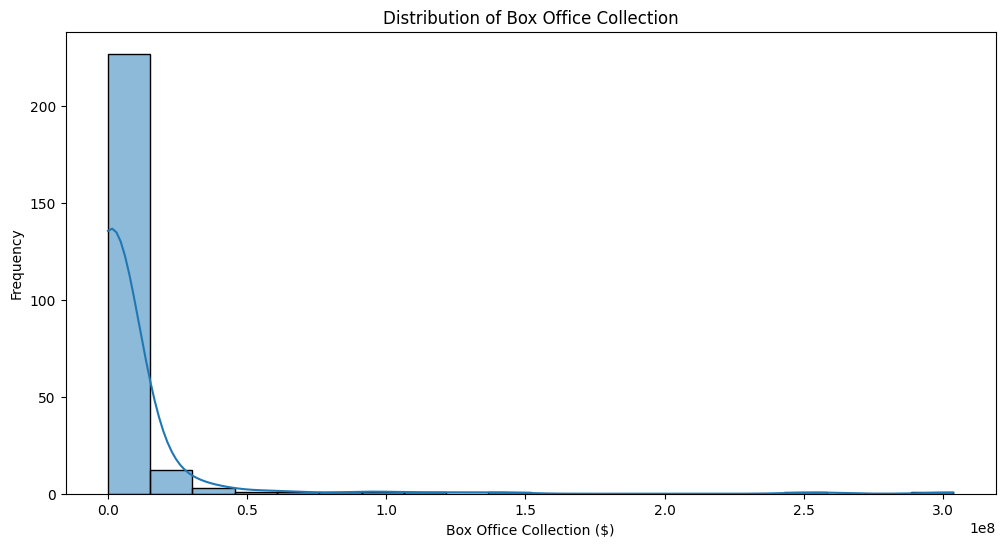

In [8]:

plt.figure(figsize=(12, 6))
sns.histplot(df['Box office collection'].dropna(), kde=True, bins=20)
plt.title('Distribution of Box Office Collection')
plt.xlabel('Box Office Collection ($)')
plt.ylabel('Frequency')
plt.show()

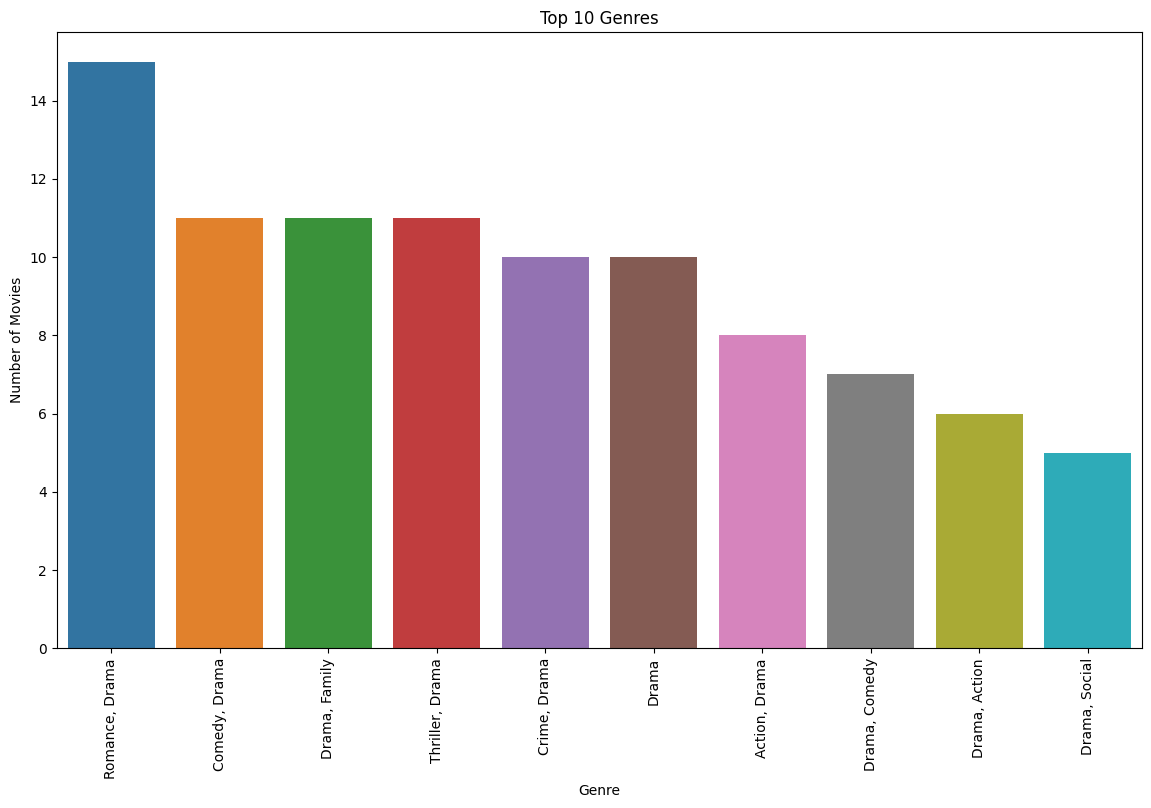

In [9]:
# genre Analysis
plt.figure(figsize=(14, 8))
top_genres = df['Genre'].value_counts().head(10)
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()


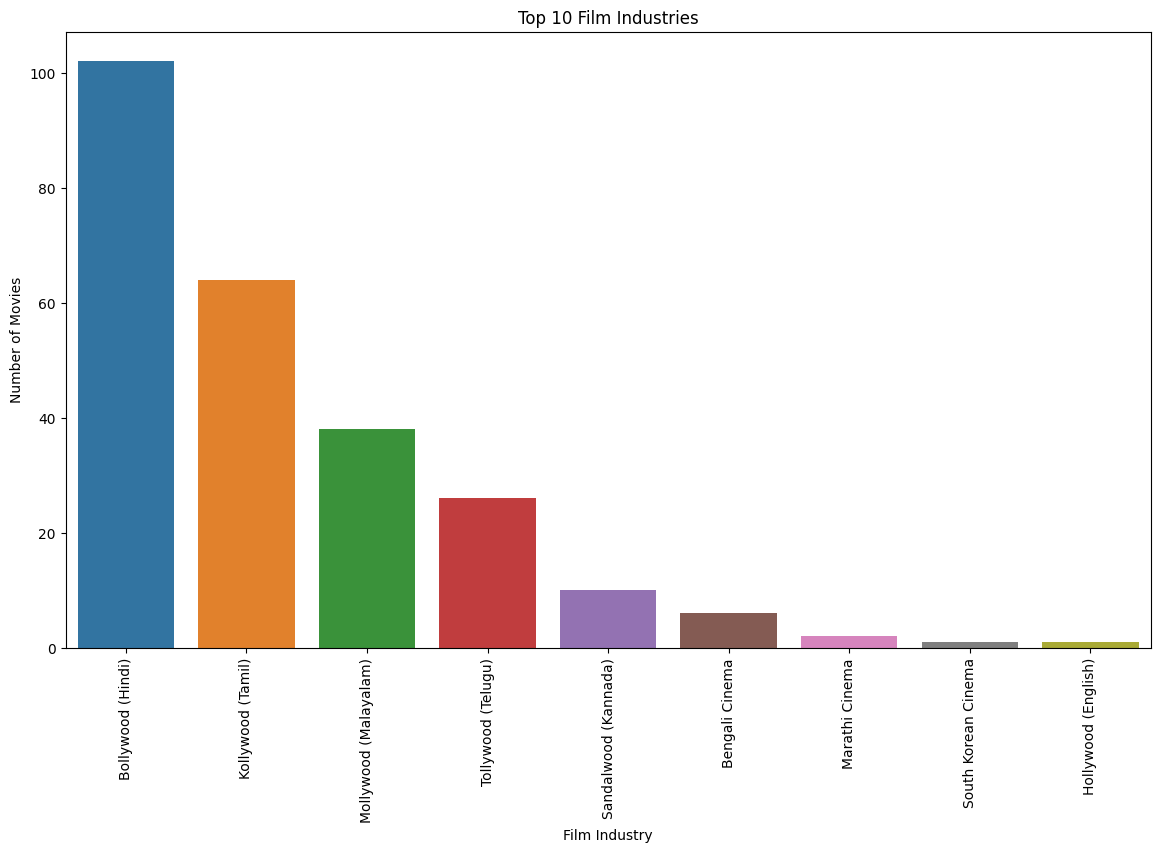

In [10]:
# film Industry Analysis
plt.figure(figsize=(14, 8))
top_industries = df['Film Industry'].value_counts().head(10)
sns.barplot(x=top_industries.index, y=top_industries.values)
plt.title('Top 10 Film Industries')
plt.xlabel('Film Industry')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()


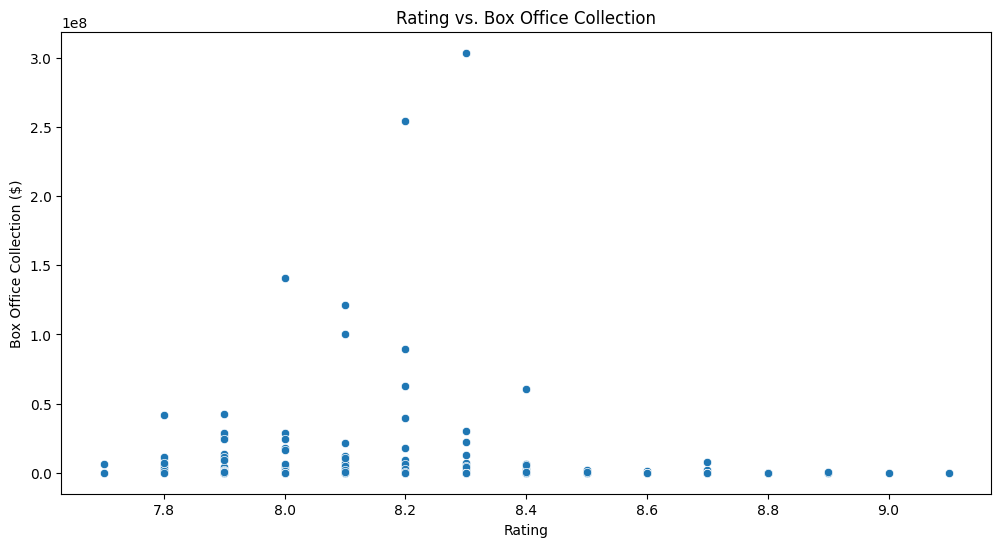

In [11]:
# rating vs. Box Office Collection
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Rating', y='Box office collection', data=df)
plt.title('Rating vs. Box Office Collection')
plt.xlabel('Rating')
plt.ylabel('Box Office Collection ($)')
plt.show()

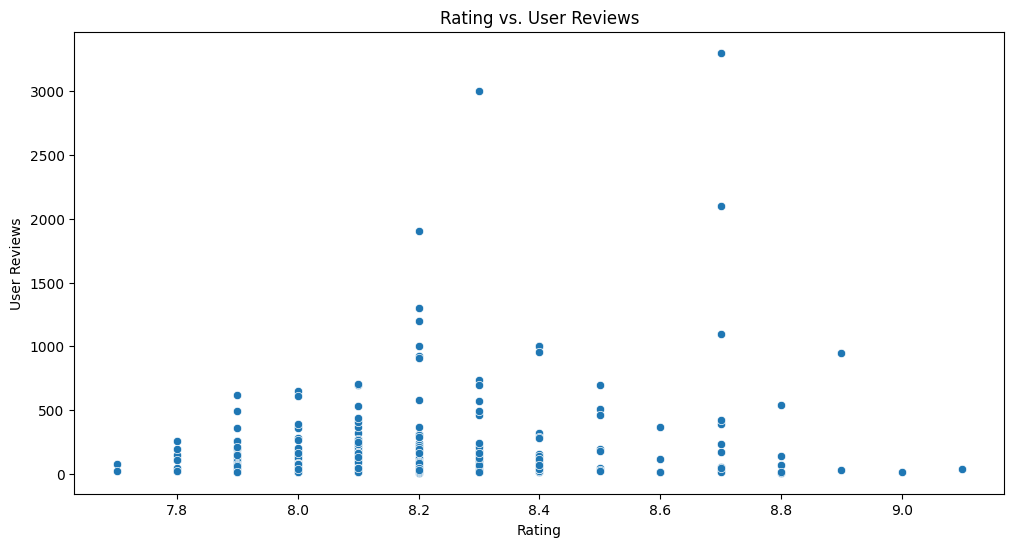

In [12]:
# rating vs. User Reviews
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Rating', y='User reviews', data=df)
plt.title('Rating vs. User Reviews')
plt.xlabel('Rating')
plt.ylabel('User Reviews')
plt.show()

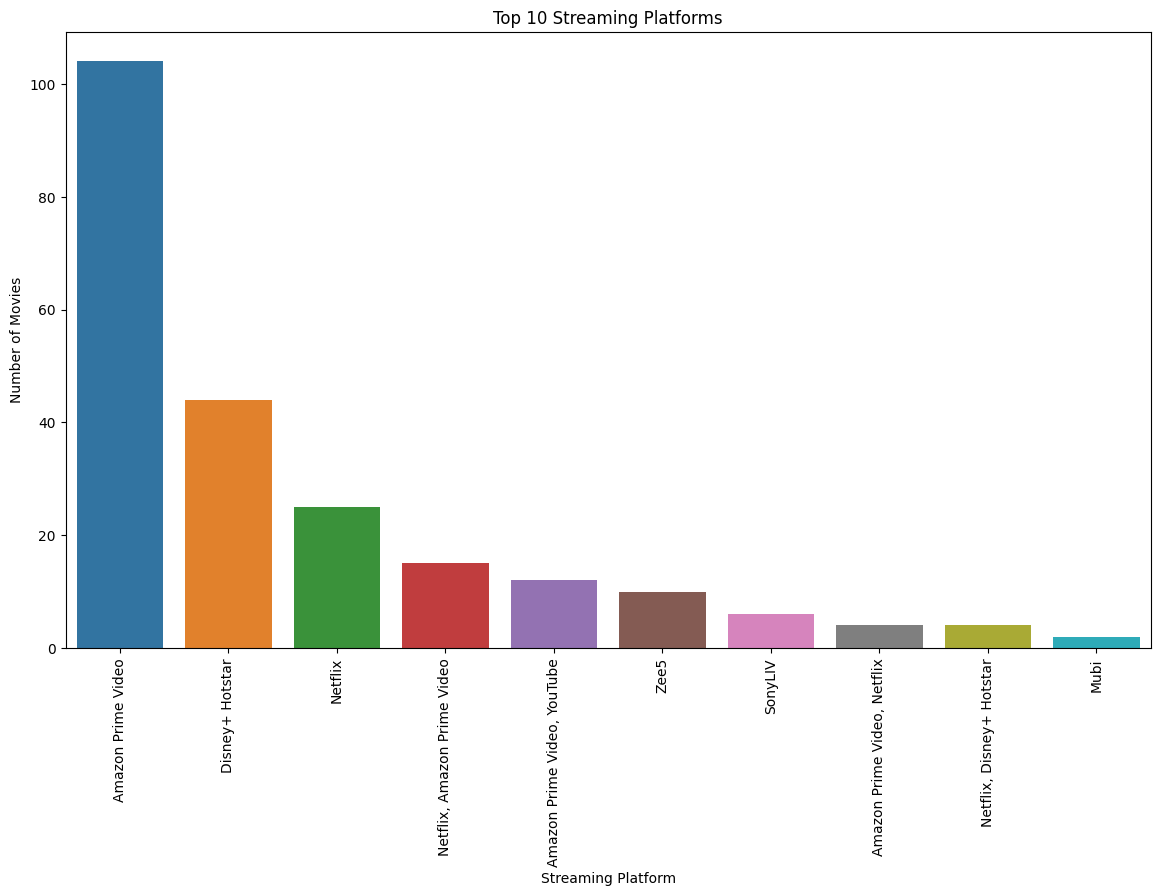

In [13]:
# streaming Platform Analysis
plt.figure(figsize=(14, 8))
top_streaming_platforms = df['Streaming platform'].value_counts().head(10)
sns.barplot(x=top_streaming_platforms.index, y=top_streaming_platforms.values)
plt.title('Top 10 Streaming Platforms')
plt.xlabel('Streaming Platform')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


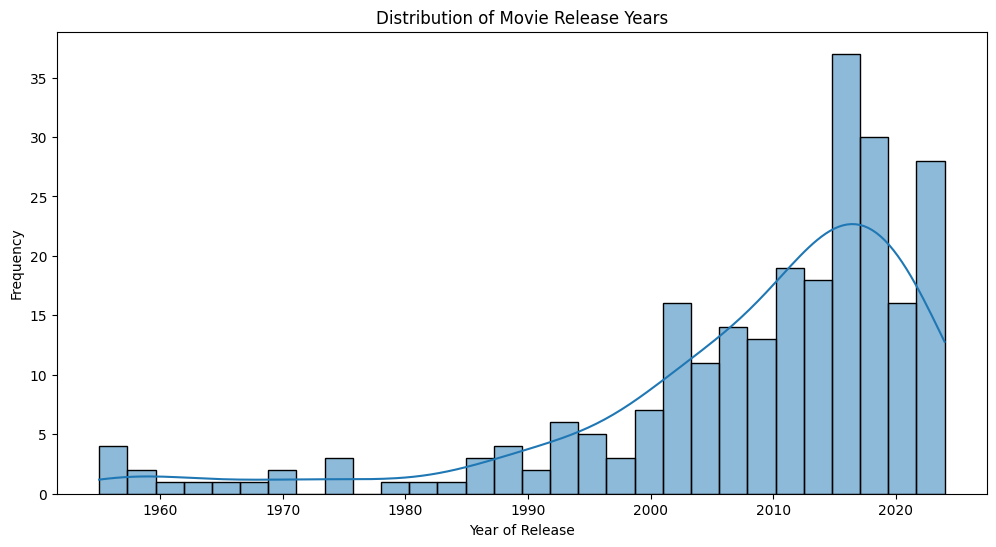

In [14]:
#distribution of Movie Release Years
plt.figure(figsize=(12, 6))
sns.histplot(df['Year of release'], bins=30, kde=True)
plt.title('Distribution of Movie Release Years')
plt.xlabel('Year of Release')
plt.ylabel('Frequency')
plt.show()

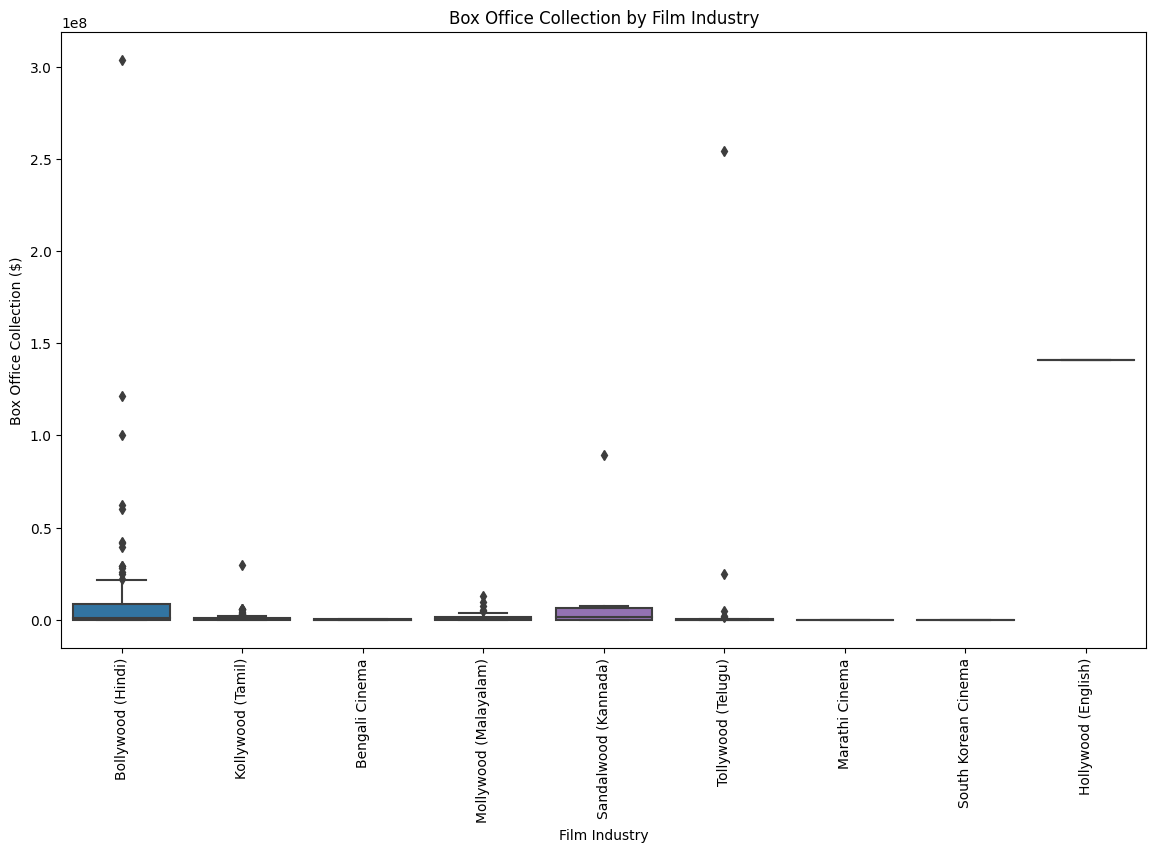

In [15]:
# box Office Collection by Film Industry
plt.figure(figsize=(14, 8))
plt.xticks(rotation=90)
sns.boxplot(x='Film Industry', y='Box office collection', data=df)
plt.title('Box Office Collection by Film Industry')
plt.xlabel('Film Industry')
plt.ylabel('Box Office Collection ($)')
plt.show()

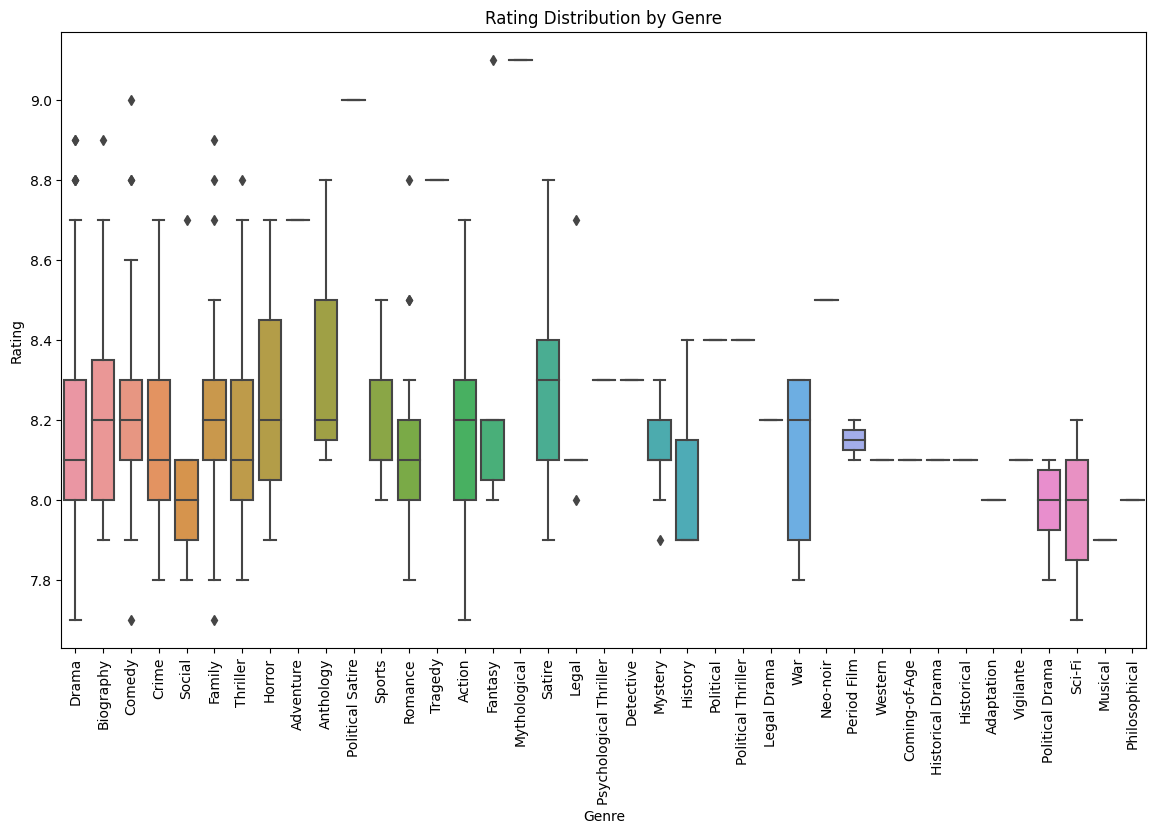

In [16]:
#rating Distribution by Genre
plt.figure(figsize=(14, 8))
df_genre = df[['Genre', 'Rating']].copy()
df_genre['Genre'] = df_genre['Genre'].str.split(',').apply(lambda x: [g.strip() for g in x])
df_genre = df_genre.explode('Genre')
plt.xticks(rotation=90)
sns.boxplot(x='Genre', y='Rating', data=df_genre)
plt.title('Rating Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()

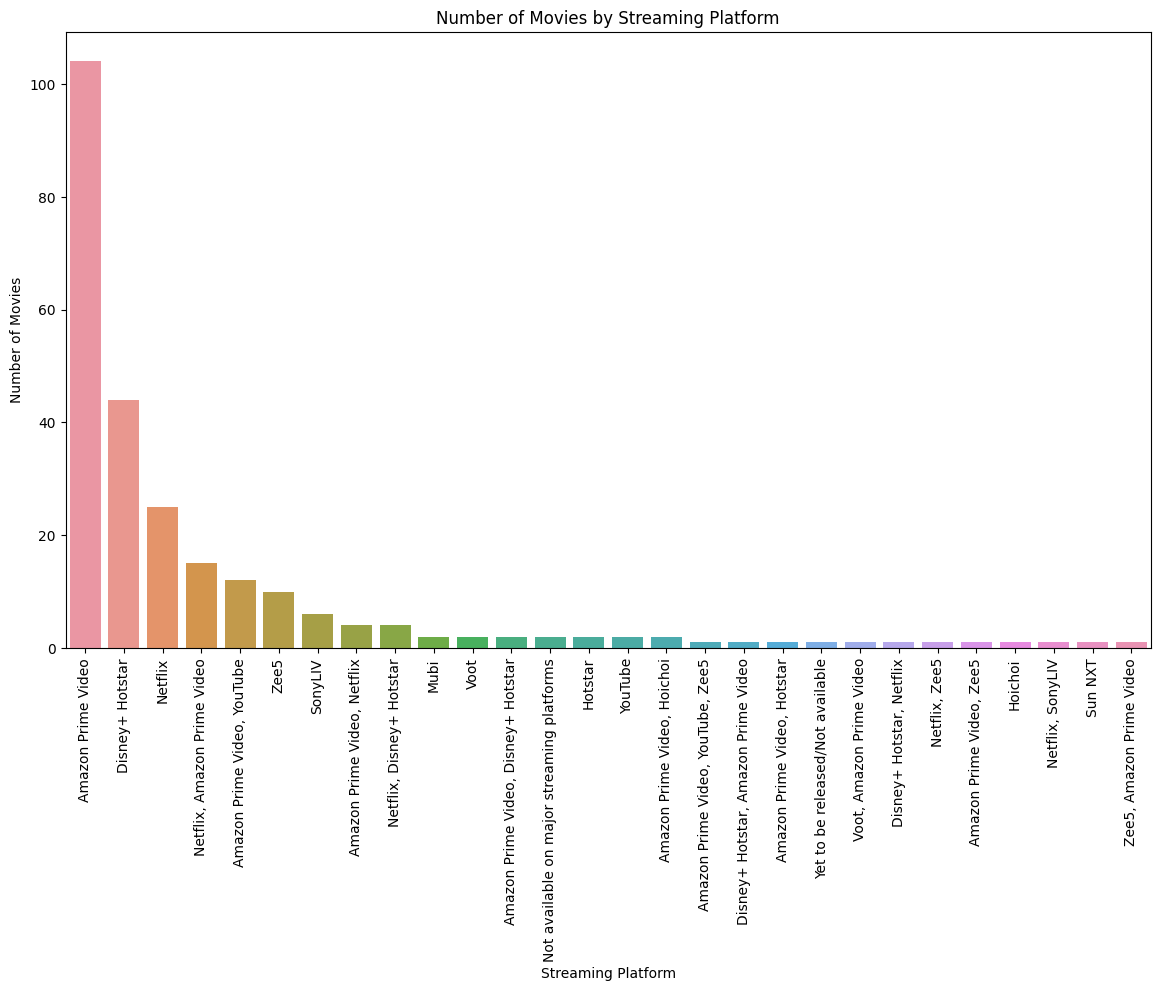

In [17]:
#number of Movies by Streaming Platform
plt.figure(figsize=(14, 8))
top_streaming_platforms = df['Streaming platform'].value_counts()
sns.barplot(x=top_streaming_platforms.index, y=top_streaming_platforms.values)
plt.title('Number of Movies by Streaming Platform')
plt.xlabel('Streaming Platform')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

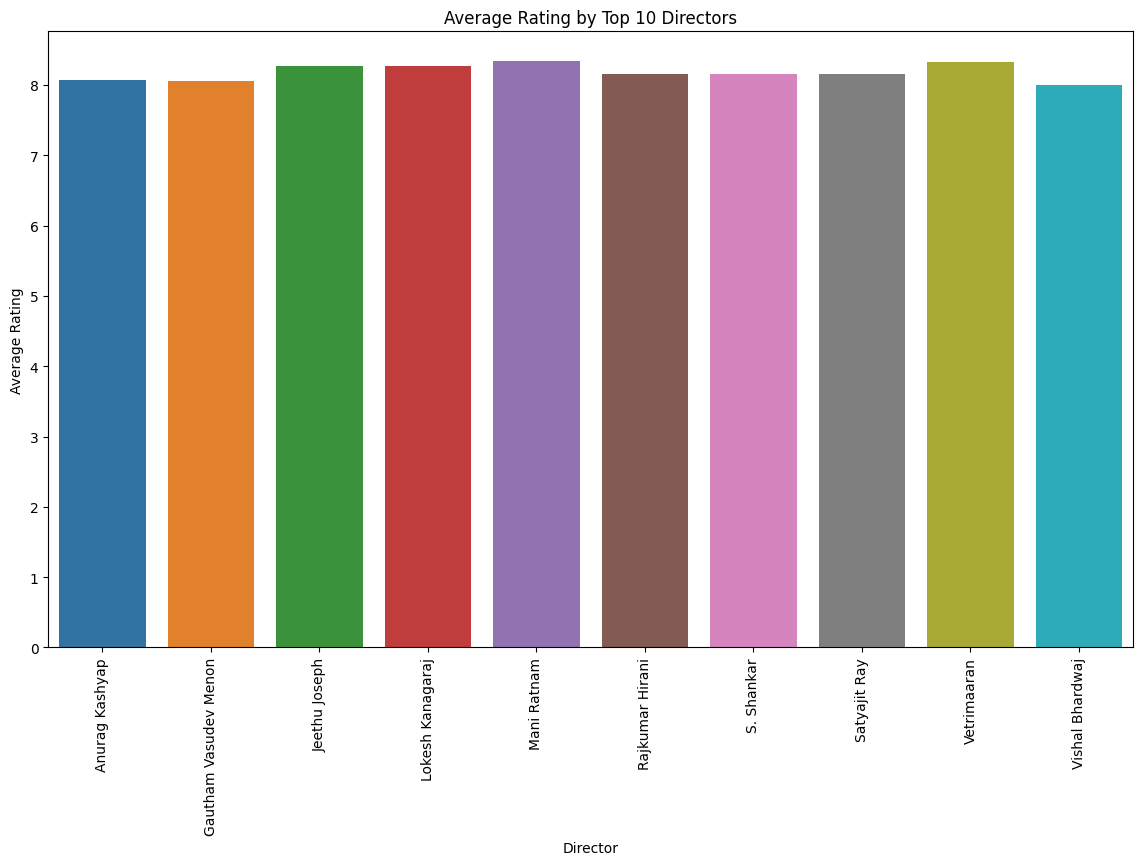

In [18]:
#average Rating by Director
plt.figure(figsize=(14, 8))
top_directors = df['Director'].value_counts().head(10).index
df_directors = df[df['Director'].isin(top_directors)]
sns.barplot(x='Director', y='Rating', data=df_directors.groupby('Director').agg({'Rating': 'mean'}).reset_index())
plt.title('Average Rating by Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


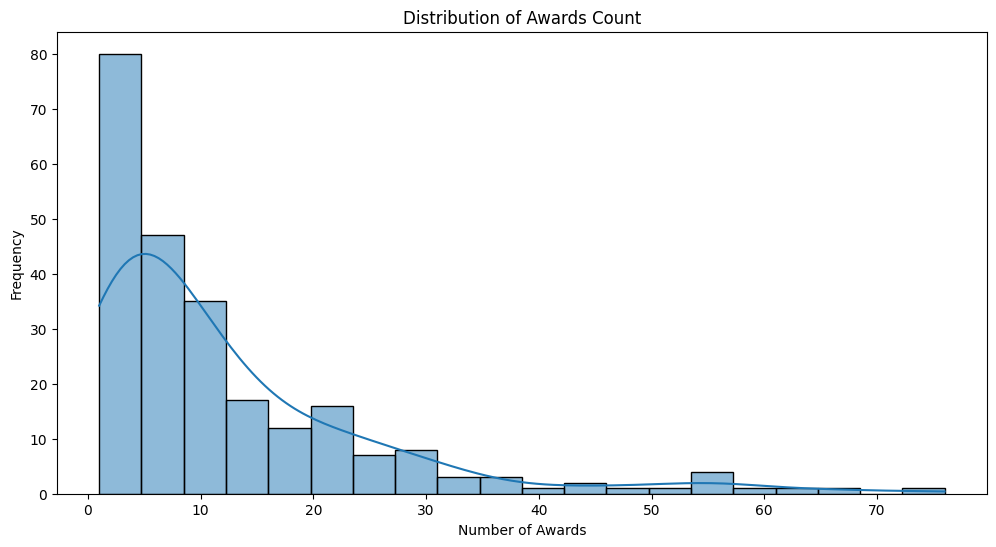

In [19]:
#awards Count
plt.figure(figsize=(12, 6))
df['Awards Count'] = df['Awards'].str.extract('(\d+)').astype(float)
sns.histplot(df['Awards Count'].dropna(), kde=True, bins=20)
plt.title('Distribution of Awards Count')
plt.xlabel('Number of Awards')
plt.ylabel('Frequency')
plt.show()


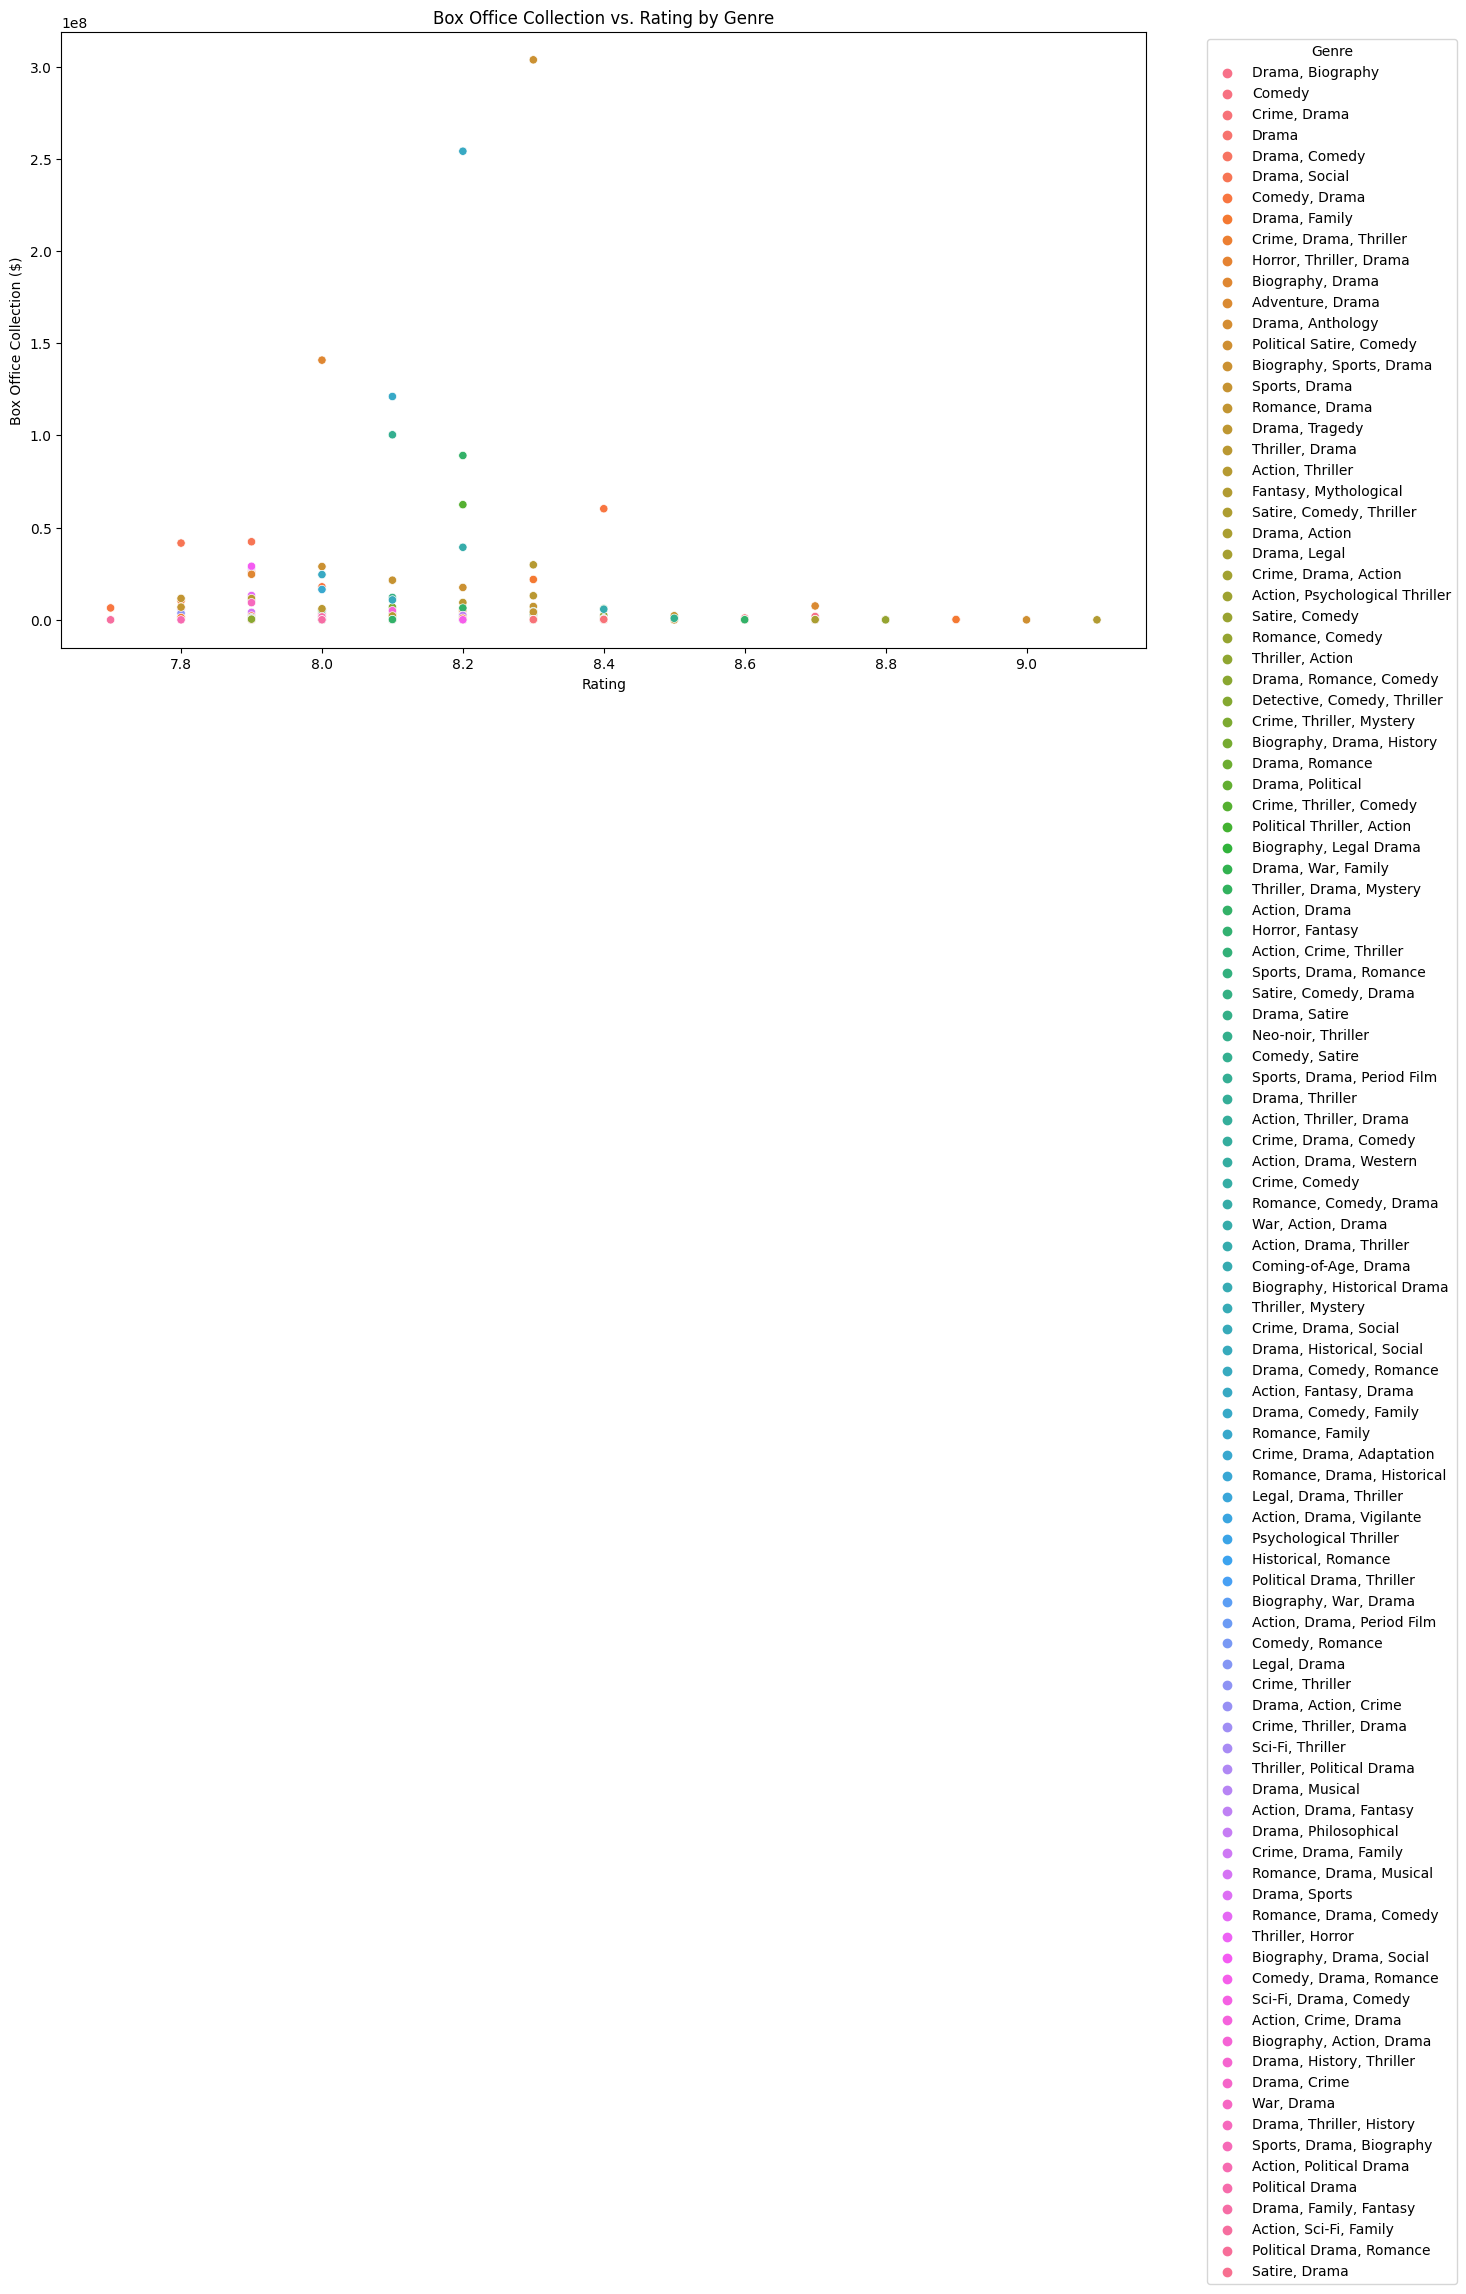

In [20]:
#box Office Collection vs. Rating by Genre
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Rating', y='Box office collection', hue='Genre', data=df)
plt.title('Box Office Collection vs. Rating by Genre')
plt.xlabel('Rating')
plt.ylabel('Box Office Collection ($)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

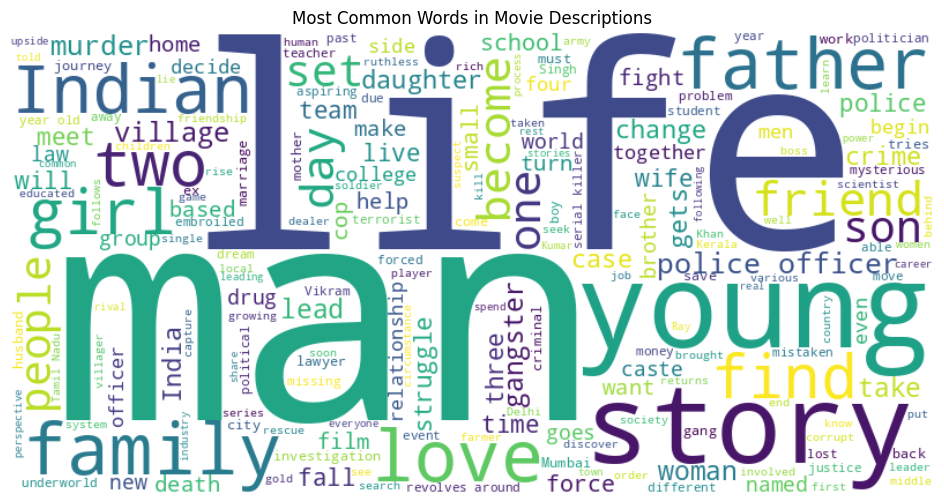

In [21]:
#most Common Descriptions Word Cloud
from wordcloud import WordCloud

# Combine all descriptions into one text
text = ' '.join(df['Description'].astype(str))

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Movie Descriptions')
plt.show()